## RESTAURANT RECOMMENDATION SYSTEM

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Required Data

In [2]:
df = pd.read_csv("../data/zomato.csv")

In [3]:
df.head(30)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


### Understanding the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df1 = df.copy()

In [7]:
df1.duplicated().sum()

0

### Removing columns which are not required

In [8]:
df1.drop("dish_liked",axis=1,inplace=True)

In [9]:
((df1.isnull() | df1.isna()).sum() * 100 / df1.index.size).round(2)

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [10]:
df1.index.size

51717

### Dropping null/nan values

In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.shape

(42944, 16)

In [13]:
df1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Cleaning the columns as per the requirement

In [14]:
x= df1.copy()
x.rate = x.rate.astype(str)
x.rate= x.rate.apply(lambda x :x.replace("/5",""))
x.rate= x.rate.apply(lambda x :x.replace("-","0"))
x.rate= x.rate.apply(lambda x :x.replace("NEW","0"))
x.rate = x.rate.astype(float)
x.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
x.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
x.rename(columns={'approx_cost(for two people)': 'cost_for_two','listed_in(type)':'restaurant_type','listed_in(city)':'city'},inplace=True)

In [17]:
x.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,restaurant_type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
x.drop(['url','phone','menu_item','city'],axis=1,inplace=True)

In [19]:
x.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,restaurant_type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [20]:
x['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [21]:
x.cost_for_two =x.cost_for_two.astype(str)
x.cost_for_two = x.cost_for_two.apply(lambda x:x.replace(',',''))
x.cost_for_two =x.cost_for_two.astype(int)

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42944 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          42944 non-null  object 
 1   name             42944 non-null  object 
 2   online_order     42944 non-null  object 
 3   book_table       42944 non-null  object 
 4   rate             42944 non-null  float64
 5   votes            42944 non-null  int64  
 6   location         42944 non-null  object 
 7   rest_type        42944 non-null  object 
 8   cuisines         42944 non-null  object 
 9   cost_for_two     42944 non-null  int32  
 10  reviews_list     42944 non-null  object 
 11  restaurant_type  42944 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 4.1+ MB


In [23]:
x.restaurant_type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [24]:
x.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [25]:
x.head(20)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,restaurant_type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes


In [26]:
x.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

### Understanding the available cleaned data using EDA

c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_for_two', ylabel='Density'>

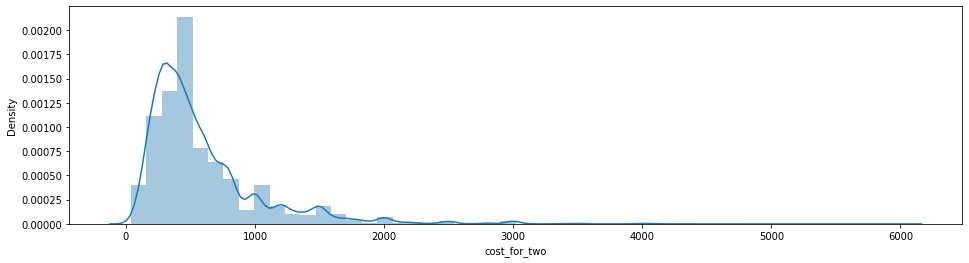

In [27]:
fig, ax = plt.subplots(figsize= [16,4])
sns.distplot(x['cost_for_two'],ax=ax)

c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurant Type wise Restaurant count')

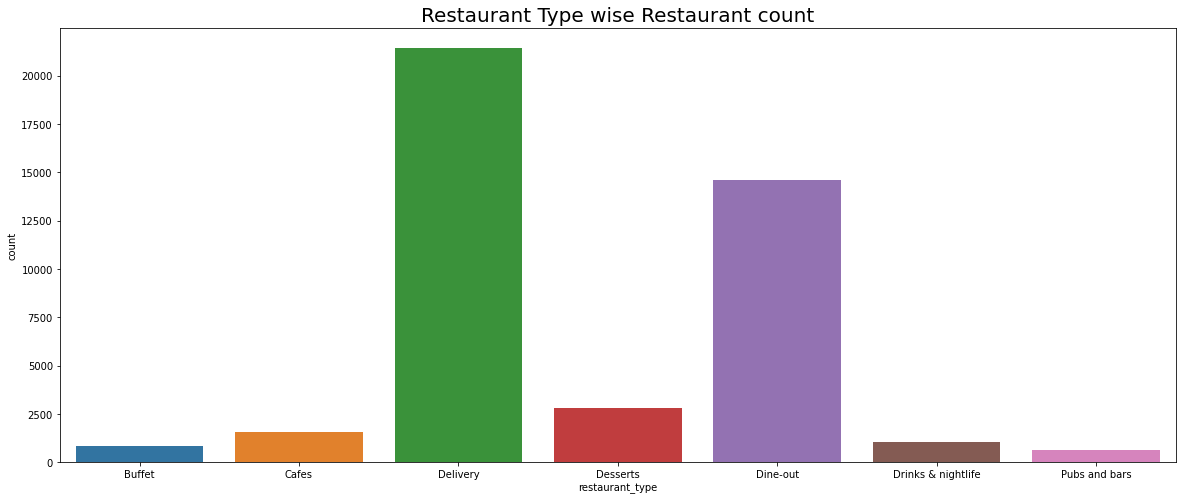

In [28]:
plt.figure(figsize=[20,8])
sns.countplot('restaurant_type',data=x)
plt.title("Restaurant Type wise Restaurant count", size=20)

c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rest_type wise Restaurant count')

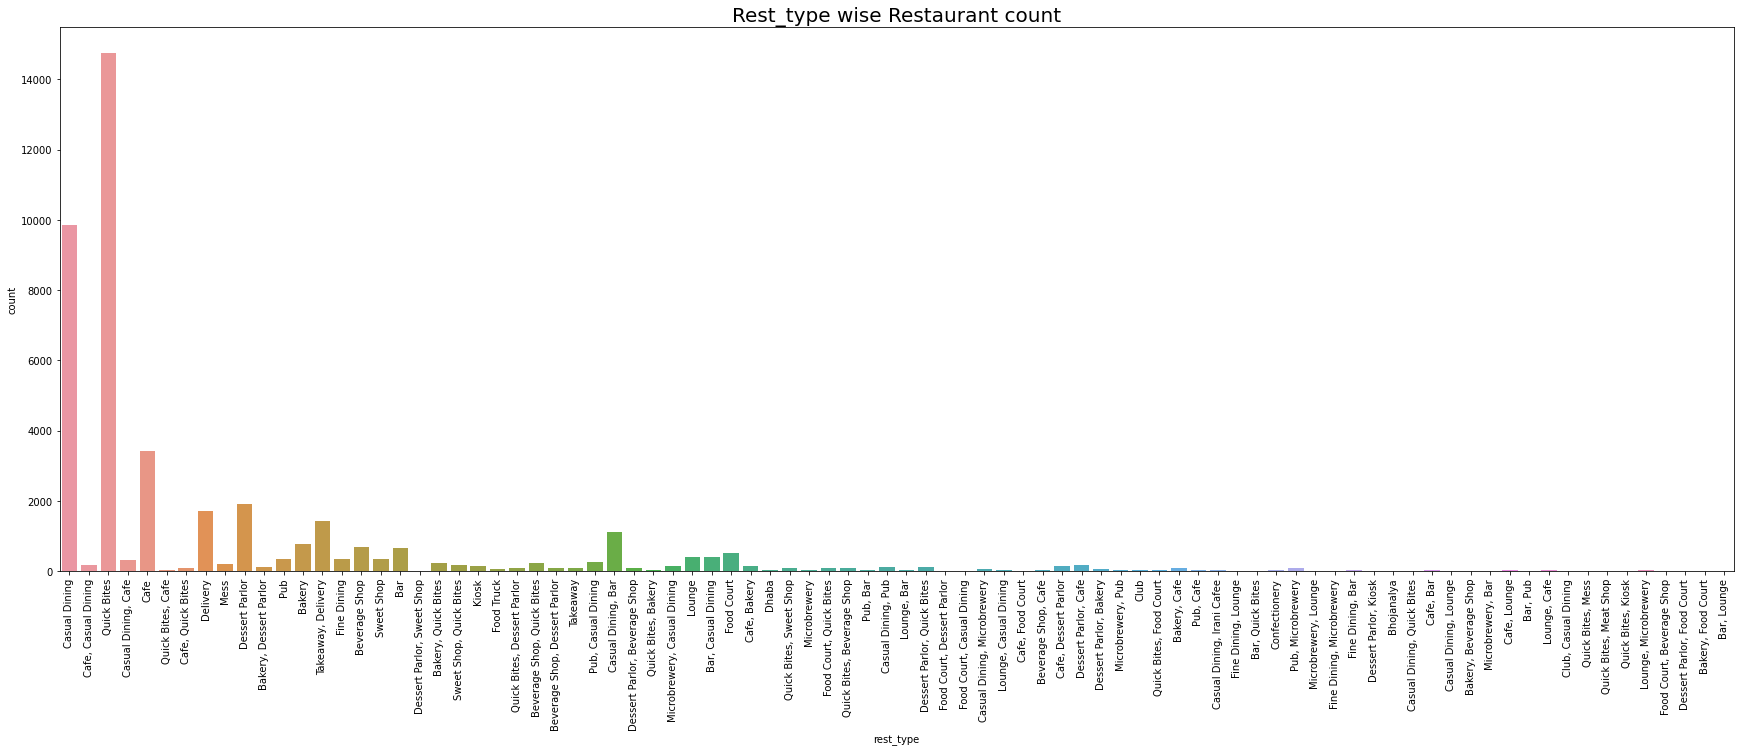

In [29]:
plt.figure(figsize=[30,10])
plt.xticks(rotation=90)
sns.countplot('rest_type',data=x)
plt.title("Rest_type wise Restaurant count", size=20)

c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location wise Restaurant count')

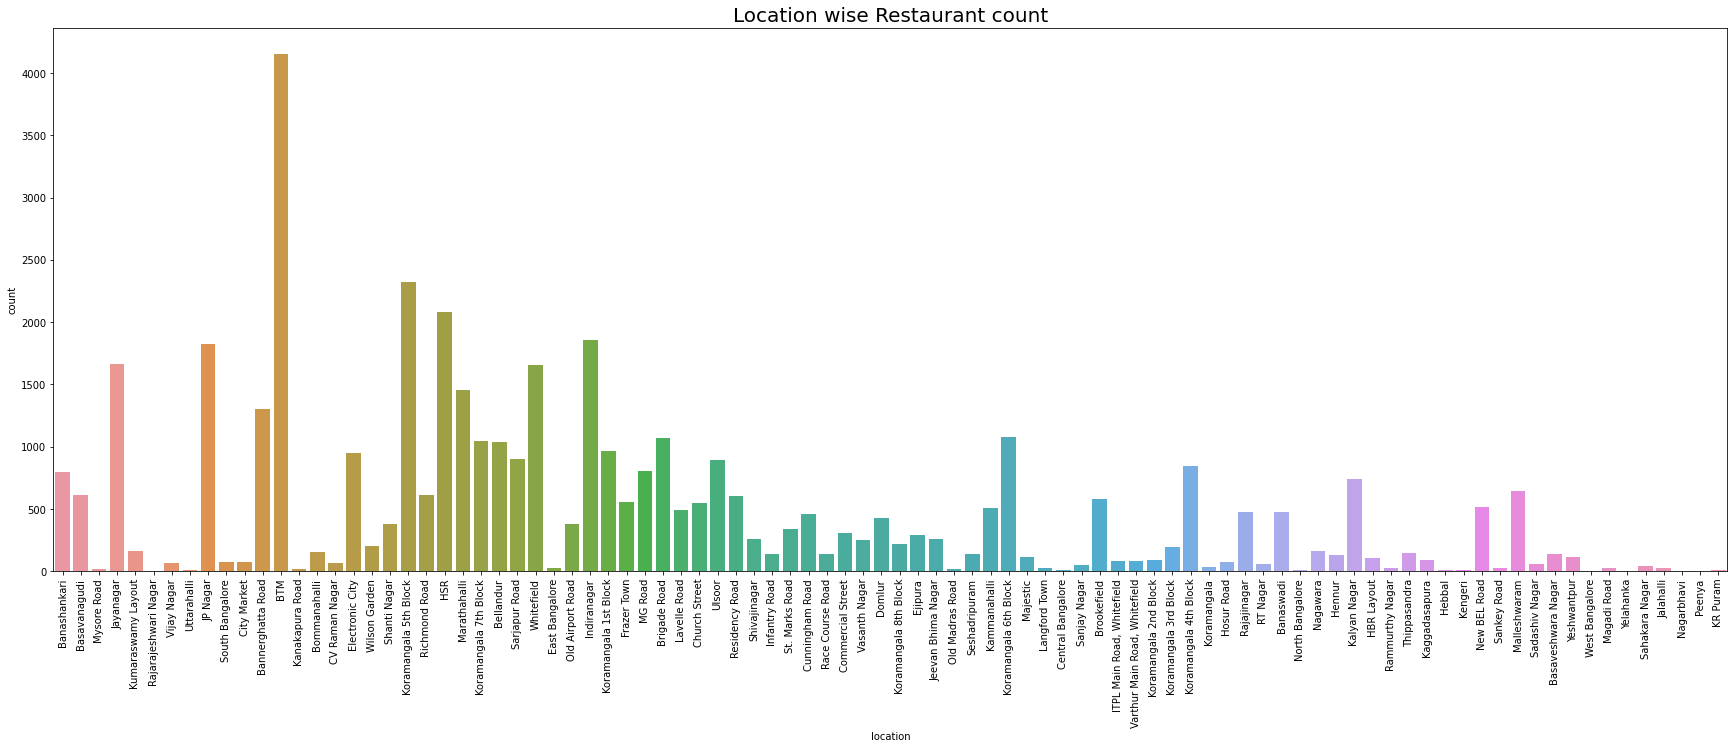

In [30]:
plt.figure(figsize=[30,10])
plt.xticks(rotation=90)

sns.countplot('location',data=x)
plt.title("Location wise Restaurant count", size=20)

Text(0.5, 1.0, 'Online Order')

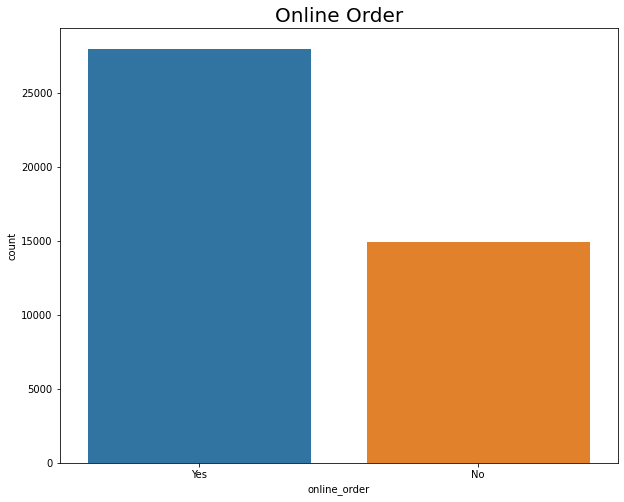

In [31]:
plt.figure(figsize=[10,8])
sns.countplot(x="online_order",data=x)
plt.title("Online Order", size = 20)

Text(0.5, 1.0, 'Book Table')

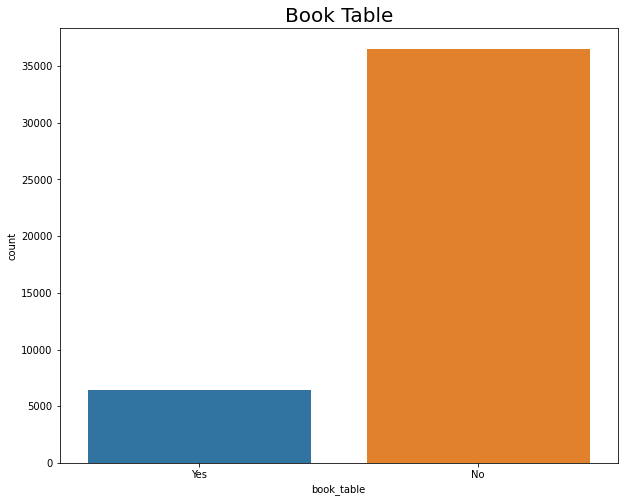

In [32]:
plt.figure(figsize=[10,8])
sns.countplot(x="book_table",data=x)
plt.title("Book Table", size = 20)

Text(0, 0.5, 'Restaurant Name')

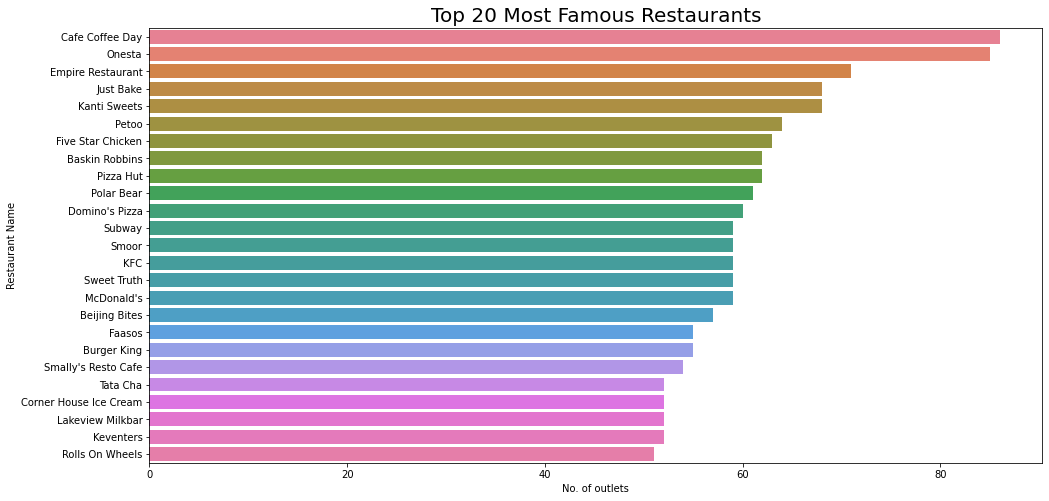

In [33]:
plt.figure(figsize=[16,8])
chain = x["name"].value_counts()[:25]

sns.barplot(x=chain,y=chain.index,palette="husl")

plt.title("Top 20 Most Famous Restaurants", size=20)
plt.xlabel("No. of outlets")
plt.ylabel("Restaurant Name")

c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Restaurant Name')

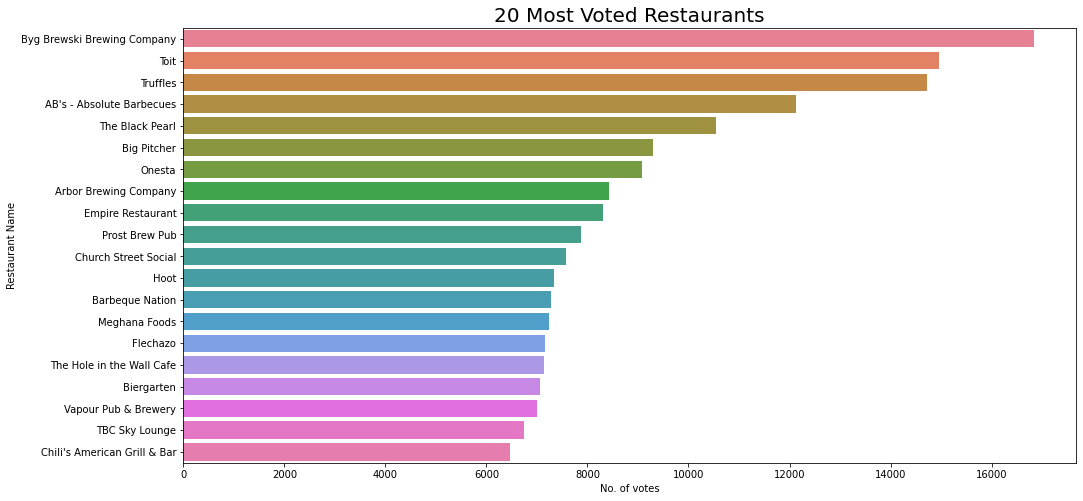

In [34]:
gx = x.groupby("name")["votes"].max().nlargest(20)
gy = x.groupby("name")["votes"].max().nlargest(20).index

plt.figure(figsize=[16,8])
sns.barplot(gx,gy,palette="husl")
plt.title("20 Most Voted Restaurants", size=20)
plt.xlabel("No. of votes")
plt.ylabel("Restaurant Name")

c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisines'>

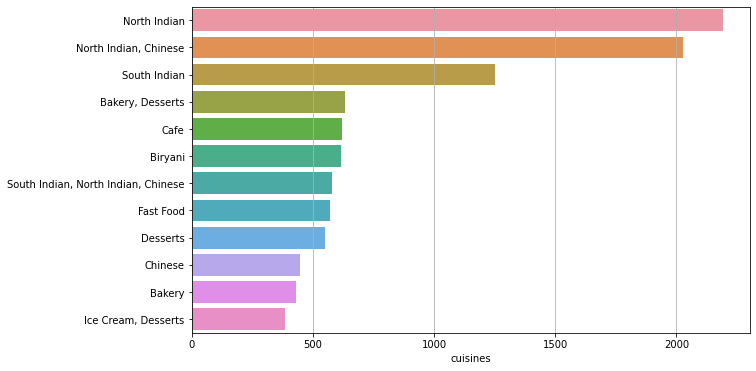

In [35]:
cuisine = x["cuisines"].value_counts()[:12]
plt.figure(figsize=(10,6))
plt.grid(True)
sns.barplot(cuisine,cuisine.index)

In [38]:
x.to_csv("../data/fornlp.csv")

### Geospatial 

In [40]:
from geopy.geocoders import Nominatim

In [ ]:
locations = pd.DataFrame({"location" : x.location.unique()})


In [ ]:
lat = []
long = []
for location in locations["location"]:
    try:
        geolocator = Nominatim(user_agent="My")
        location = geolocator.geocode(location)
        #print(location.address)
        lat.append(location.latitude)
        long.append(location.longitude)
    except:
        lat.append(np.nan)
        long.append(np.nan)
locations["latitude"] = lat
locations["longitude"] = long

In [ ]:
rest_locations = pd.DataFrame(x["location"].value_counts().reset_index())
rest_locations.columns = ['location', 'count']
rest_locations

In [ ]:
print(locations.shape)
print(rest_locations.shape)

In [ ]:
restaurant_locations = rest_locations.merge(locations, on="location", how = "left").dropna()
restaurant_locations.head()

In [ ]:
import folium
from folium.plugins import HeatMap, FastMarkerCluster

In [ ]:
#### Bengaluru Coordinates - (12.9716° N, 77.5946° E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
def generateMap(default_location = [12.97,77.59], default_zoom_start = 12):
    map = folium.Map(width=550, height=350,location=default_location, zoom_start=default_zoom_start, min_zoom=7, max_zoom=14)
    return map

In [ ]:
basemap = generateMap()
fig.add_child(basemap)

In [ ]:
HeatMap(restaurant_locations[["latitude","longitude","count"]], zoom = 20, radius = 15).add_to(basemap)
basemap

In [ ]:
FastMarkerCluster(data = restaurant_locations[["latitude","longitude","count"]].values.tolist()).add_to(basemap)
basemap

In [ ]:
geolocator = Nominatim(user_agent="My")
location = geolocator.geocode("Central Bangalore")
print(location.address)
print(location.latitude)
print(location.longitude)

In [ ]:
df.address[0]

In [ ]:
location.point

In [ ]:
locations

In [ ]:
latitudes={}
longitudes = {}
for l in locations:
    
    try:
        geolocator = Nominatim(user_agent="My")
        location = geolocator.geocode(l)
        latitudes[l]=location.latitude
        longitudes[l]=location.longitude
    except:
        latitudes[l]=None
        longitudes[l]=None
    

In [ ]:
print(latitudes)

In [ ]:
print(longitudes)

In [ ]:
loc = pd.DataFrame([latitudes, longitudes])

In [ ]:
loc = loc.transpose().head()

In [ ]:
loc.index(['Banashankari', 'Basavanagudi'])

In [ ]:
x.shape

In [ ]:
geolocator = Nominatim(user_agent="My")
location = geolocator.geocode("2nd stage,Banashankari, Bangalore")
print(location.latitude)
print(location.longitude)
print(location.address)

In [ ]:
geolocator = Nominatim(user_agent="My")
location = geolocator.geocode("JP Nagar, Bangalore")
print(location.latitude)
print(location.longitude)
print(location.address)

In [ ]:
len(df.address.unique())

In [ ]:
plt.figure(figsize=(16,4))
plt.suptitle("Cost of meal for two", fontweight="bold", fontsize=20)



plt.subplot(1,3,1)
sns.distplot(x["cost_for_two"])

plt.subplot(1,3,2)
sns.boxplot(x=x["cost_for_two"])

plt.subplot(1,3,3)
plt.hist(x=x["cost_for_two"])

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Votes", fontweight="bold", fontsize=15)

plt.subplot(1,3,1)
sns.distplot(x["votes"])

plt.subplot(1,3,2)
sns.boxplot(x["votes"])

plt.subplot(1,3,3)
plt.hist(x=x["votes"])

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Rating", fontweight="bold", fontsize= 20)

plt.subplot(1,3,1)
sns.distplot(x["rate"])

plt.subplot(1,3,2)
sns.boxplot(x=x["rate"])

plt.subplot(1,3,3)
plt.hist(x["rate"])

In [45]:
api_key = "Asd_YyfsODTSJELwJ4F5feuHCiL1ORy-7MHuiuRR4uwTzZer00BMm4Vm2oWSjEHf"


In [46]:
from geopy.geocoders import Bing
geolocator = Bing(api_key=api_key)

In [43]:
lat = []
long = []
for location in x.address:
    try:
        location = re.sub("[^a-zA-Z 0-9'\.\-\s\,\&\/]","",location)
        ad = geolocator.geocode(location)
        lat.append(ad.latitude)
        long.append(ad.longitude)
    except:
        lat.append(np.nan)
        long.append(np.nan)
x["latitude"] = lat
x["longitude"] = long

In [44]:
x.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,restaurant_type,latitude,longitude
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,12.926226,77.564738
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,12.914659,77.559005
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,12.922256,77.557671
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,12.922256,77.557671
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,12.967705,77.569104


In [45]:
x.to_csv("../data/coord.csv")

In [51]:
len(x.name.unique())

7044

In [39]:
for addr,location in x["address"],x["location"]:
    print(addr,"   :   ",location)

ValueError: too many values to unpack (expected 2)

In [76]:
y = pd.read_csv("../data/coord.csv")
y.head()


,Unnamed: 0,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,restaurant_type,latitude,longitude
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,12.926226,77.564738
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,12.914659,77.559005
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,12.922256,77.557671
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,12.922256,77.557671
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,12.967705,77.569104


In [ ]:
def lat(x):
    if np.isnan(x[13]) == True:
        print("true")
        location=x[0]
        try:
            location = re.sub("[^a-zA-Z 0-9'\.\-\s\,\&\/]","",location)
            ad = geolocator.geocode(location)
            x[13]=ad.latitude
            x[14]=ad.longitude
        except:
            ad = geolocator.geocode(x[6])
            x[13]=ad.latitude
            x[14]=ad.longitude
        finally:
            return x
    return x




In [ ]:
df2 = y.apply(lambda x : lat(x), axis=1)

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [67]:
df2.isna().sum()

Unnamed: 0            0
address               0
name                  0
online_order          0
book_table            0
rate                  0
votes                 0
location              0
rest_type             0
cuisines              0
cost_for_two          0
reviews_list          0
restaurant_type       0
latitude           4096
longitude          4096
dtype: int64